In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [7]:
sensing = pd.read_csv('data/Kaggle-College-Experiences/Sensing/sensing.csv')

In [37]:
sensing_sample = sensing.sample(n=1000)
display(sensing_sample.head())

,uid,is_ios,day,act_in_vehicle_ep_0,act_in_vehicle_ep_1,act_in_vehicle_ep_2,act_in_vehicle_ep_3,act_in_vehicle_hr_0,act_in_vehicle_hr_1,act_in_vehicle_hr_10,...,unlock_num_hr_22,unlock_num_hr_23,unlock_num_hr_3,unlock_num_hr_4,unlock_num_hr_5,unlock_num_hr_6,unlock_num_hr_7,unlock_num_hr_8,unlock_num_hr_9,sleep_heathkit_dur
259,1ff6d7f34acb354430e7323a35ff7703,1,20180524,29,0,0,29,0,0,0,...,2,1,0,0,0,0,1,4,3,8.25
91970,c2d80f95e15e8973a9a943564baea1b7,1,20200121,3613,0,1367,2246,0,0,0,...,4,3,1,0,0,0,0,0,0,18.80
146411,713a6a94988cc13bf0bb50ad0cb0a015,1,20220512,0,0,0,0,0,0,0,...,2,0,0,0,1,0,0,2,4,NaN
1824,fa394f6d3d077bd5568fc3bc01580806,1,20181208,18,0,0,18,0,0,0,...,9,4,0,0,0,0,0,2,3,NaN
102491,b1fed5ab5fbd8a1b2fd93b925849a11c,1,20180131,0,0,0,0,0,0,0,...,11,9,0,0,0,0,3,5,0,NaN


In [30]:
mental_health_survey = pd.read_csv('data/Mental Health Survey/Mental_Health_Survey_Feb_20_22.csv', skiprows = [1,2])
display(mental_health_survey.head())

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,feedback,timing_feedback_First Click,timing_feedback_Last Click,timing_feedback_Page Submit,timing_feedback_Click Count,Create New Field or Choose From Dropdown...,PROLIFIC_PID,FL_11_DO_PHQ-9,FL_11_DO_GAD-7,FL_11_DO_ACHA
0,1/29/2022 15:34,1/29/2022 15:37,IP Address,100,161,True,1/29/2022 15:37,R_2ziifm5KCPkSdac,anonymous,EN,...,NaN,1.703,1.703,17.747,1,NaN,NaN,1,3,2
1,1/29/2022 15:34,1/29/2022 15:40,IP Address,100,406,True,1/29/2022 15:40,R_CgipvsIKNyNWOuB,anonymous,EN,...,NaN,1.166,13.832,16.107,2,NaN,NaN,2,3,1
2,1/29/2022 15:40,1/29/2022 15:44,IP Address,100,247,True,1/29/2022 15:44,R_116JaS9DQYURFlc,anonymous,EN,...,NaN,2.131,2.131,34.597,1,NaN,NaN,3,2,1
3,1/29/2022 15:42,1/29/2022 15:46,IP Address,100,247,True,1/29/2022 15:46,R_3noq7XhdlfQwqxV,anonymous,EN,...,NaN,2.220,2.220,44.917,1,NaN,NaN,2,1,3
4,1/29/2022 15:36,1/29/2022 15:48,IP Address,100,666,True,1/29/2022 15:48,R_1fme33nwji8nGa8,anonymous,EN,...,NaN,1.190,4.132,11.540,2,NaN,NaN,1,3,2


In [32]:
frequency_mapping = {
    'Not at all': 0,
    'Several days': 1,
    'More than half of the days': 2,
    'Nearly every day': 3
}

for i in range(1, 10):
    column_name = f"phq9_{i}"
    encoded_column_name = f"{column_name}_encoded"
    mental_health_survey[encoded_column_name] = mental_health_survey[column_name].map(frequency_mapping)

mental_health_survey["phq9_1_encoded"]

0      2
1      0
2      1
3      2
4      2
      ..
576    0
577    1
578    0
579    2
580    0
Name: phq9_1_encoded, Length: 581, dtype: int64

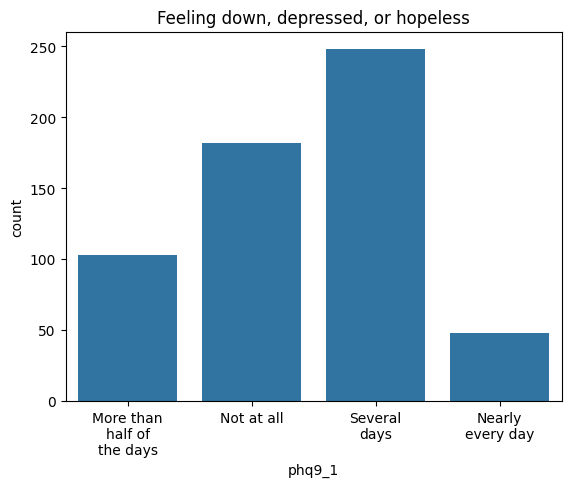

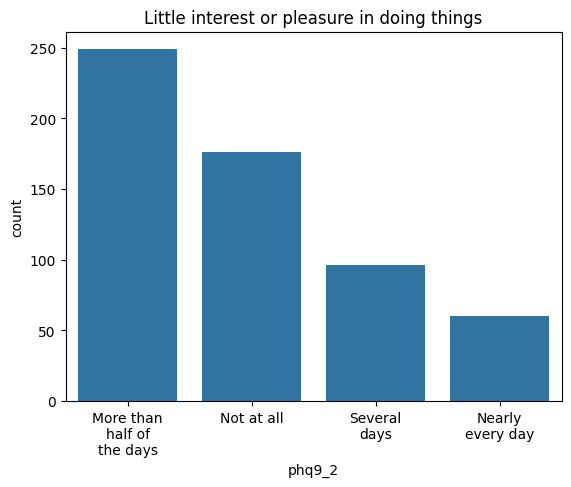

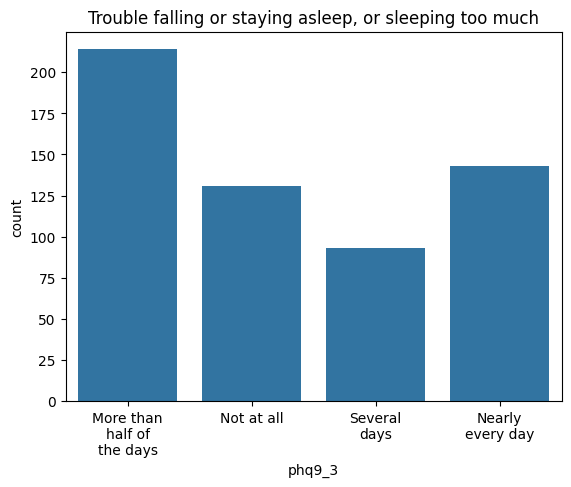

In [22]:
labels = [textwrap.fill(label, width=10) for label in mental_health_survey["phq9_1"].unique()]


sns.countplot(x='phq9_1', data=mental_health_survey).set_title("Feeling down, depressed, or hopeless")
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.show()
sns.countplot(x='phq9_2', data=mental_health_survey).set_title("Little interest or pleasure in doing things")
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.show()
sns.countplot(x='phq9_3', data=mental_health_survey).set_title("Trouble falling or staying asleep, or sleeping too much")
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.show()